In [19]:

import warnings
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt


In [20]:
(train_images , train_labels),(test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [21]:
#normalize
train_images = train_images/255
test_images = test_images/255

In [22]:
class_names = ['T-shirt/top' , 'Trouser', 'Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [23]:
#Explore the data
#the following shows there are 60000 images in the training set with each image represented as 28 x 28 pixels.
train_images.shape

(60000, 28, 28)

In [24]:
len(train_labels)

60000

In [25]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [26]:
test_images.shape

(10000, 28, 28)

In [27]:
len(test_labels)

10000

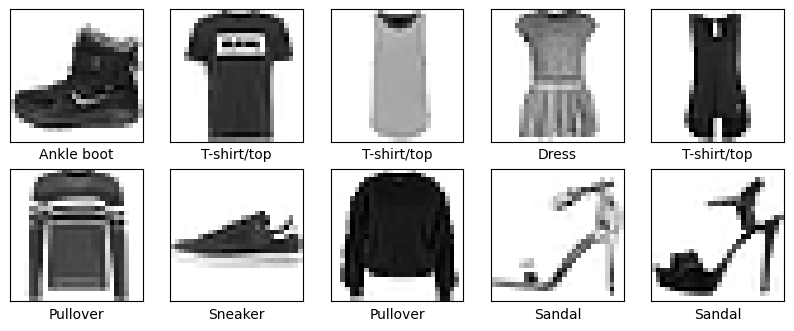

In [28]:
#Display the first 10 images
plt.figure(figsize = (10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28,28) , cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

model = Sequential([
    keras.layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1)),
    keras.layers.MaxPool2D(2,2),
    Flatten(),
    Dense(128,activation = 'relu'),
    Dense(10, activation = 'softmax')

])

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               692352    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [39]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [33]:
model.fit(train_images, train_labels, epochs=30)

1875/1875 [==============================] - 41s 22ms/step - loss: 0.3157 - accuracy: 0.8872


In [34]:
test_loss, test_acc = model.evaluate(test_images , test_labels)
print(f'Test Loss: {test_loss}')
print(f'Test accuracy:{test_acc}')

313/313 [==============================] - 2s 6ms/step - loss: 0.2946 - accuracy: 0.8941
Test Loss: 0.29461148381233215
Test accuracy:0.89410001039505


In [ ]:
#MAKE PREDICTIONS

In [35]:
predictions = model.predict(test_images)


313/313 [==============================] - 2s 6ms/step


In [36]:
predictions[0]

array([7.7240416e-05, 2.0280673e-05, 4.9068021e-05, 4.5332876e-05,
       5.3498334e-05, 6.6843624e-03, 1.9196796e-05, 7.0559639e-03,
       5.6948815e-04, 9.8542559e-01], dtype=float32)

In [37]:
np.argmax(predictions[0])

9

In [38]:
test_labels[0]

9

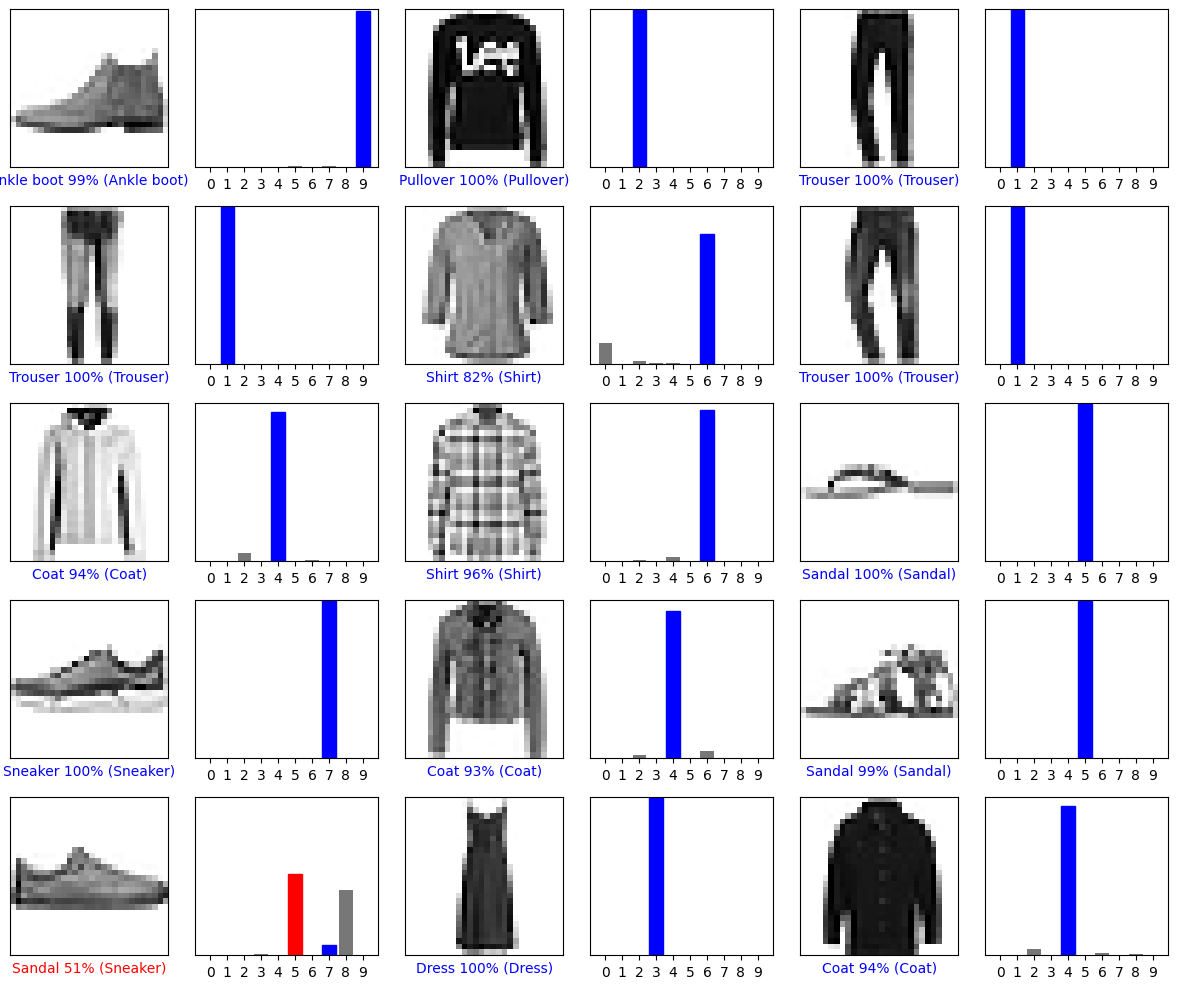

In [41]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()